In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.linear_model import BayesianRidge
import random
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# Import dataset from CSV

In [40]:
df = pd.read_csv("https://raw.githubusercontent.com/BriDeWaltCCC/PFDADataSets/main/WHO-COVID-19-global-table-data-31-08-21.csv", index_col=False)
# Remove NAs
df = df.dropna()
df.reset_index(inplace=True)

# Linear Regression Portion
## 1. Use tools provided by pandas to explore columns

In [3]:
print(df.dtypes)

display(df)
df.describe(include="all")

Name                                                             object
WHO Region                                                       object
Cases - cumulative total                                          int64
Cases - cumulative total per 100000 population                  float64
Cases - newly reported in last 7 days                             int64
Cases - newly reported in last 7 days per 100000 population     float64
Cases - newly reported in last 24 hours                           int64
Deaths - cumulative total                                         int64
Deaths - cumulative total per 100000 population                 float64
Deaths - newly reported in last 7 days                            int64
Deaths - newly reported in last 7 days per 100000 population    float64
Deaths - newly reported in last 24 hours                          int64
dtype: object


,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
1,United States of America,Americas,38524389,11638.70,977947,295.45,181046,631134,190.67,7394,2.23,1352
2,India,South-East Asia,32737939,2372.31,288633,20.92,42909,438210,31.75,3454,0.25,380
3,Brazil,Americas,20728605,9751.91,172118,80.97,24699,579010,272.40,4801,2.26,684
4,Russian Federation,Europe,6901152,4728.94,134611,92.24,18325,182429,125.01,5609,3.84,792
5,The United Kingdom,Europe,6731427,9915.78,238517,351.35,32937,132437,195.09,797,1.17,61
...,...,...,...,...,...,...,...,...,...,...,...,...
233,Saint Helena,Africa,0,0.00,0,0.00,0,0,0.00,0,0.00,0
234,Tokelau,Western Pacific,0,0.00,0,0.00,0,0,0.00,0,0.00,0
235,Tonga,Western Pacific,0,0.00,0,0.00,0,0,0.00,0,0.00,0
236,Turkmenistan,Europe,0,0.00,0,0.00,0,0,0.00,0,0.00,0


,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
count,236,236,2.360000e+02,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
unique,236,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,United States of America,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,9.165365e+05,4367.320508,18617.991525,118.358136,2493.864407,19061.177966,68.074025,277.241525,1.607627,32.618644
std,NaN,NaN,3.689711e+06,4595.376301,74212.248970,203.771924,12879.124540,69414.347446,84.649256,924.623873,4.514066,133.203375
min,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,5.818250e+03,367.980000,87.500000,4.790000,0.000000,57.250000,3.605000,0.000000,0.000000,0.000000
50%,NaN,NaN,6.350400e+04,2648.530000,1310.000000,38.365000,54.000000,1016.000000,35.435000,14.000000,0.280000,0.000000
75%,NaN,NaN,4.324555e+05,7543.022500,7358.500000,150.845000,597.500000,7281.750000,107.337500,100.000000,1.342500,8.000000


In [4]:
# Use a pair plot to try to identify good columns for further analysis
#sns.pairplot(df)

## 2. Perform Linear Regressions
### a. First Pair w/ additional Bayesian Ridge Regression

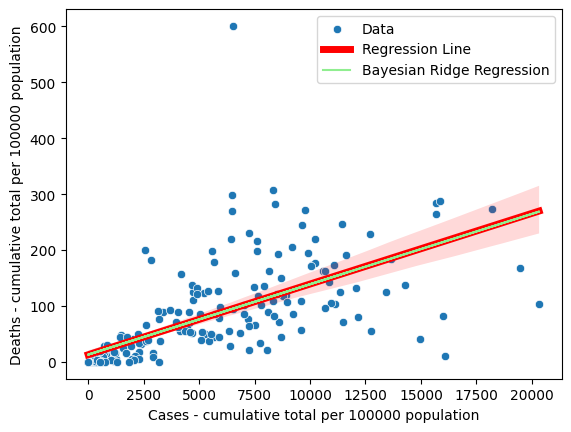

In [5]:
sns.scatterplot(data=df, x="Cases - cumulative total per 100000 population", y="Deaths - cumulative total per 100000 population", label="Data")
sns.regplot(data=df, x="Cases - cumulative total per 100000 population", y="Deaths - cumulative total per 100000 population", color="red", scatter=False, label="Regression Line", line_kws={"linewidth":5})

# Perform an additional Bayesian Ridge regression
model = BayesianRidge()
model.fit(df[["Cases - cumulative total per 100000 population"]], df["Deaths - cumulative total per 100000 population"])
y_pred = model.predict(df[["Cases - cumulative total per 100000 population"]])
plt.plot(df["Cases - cumulative total per 100000 population"], y_pred, label="Bayesian Ridge Regression", color="lightgreen")

plt.legend()
plt.show()

### b. Second Pair

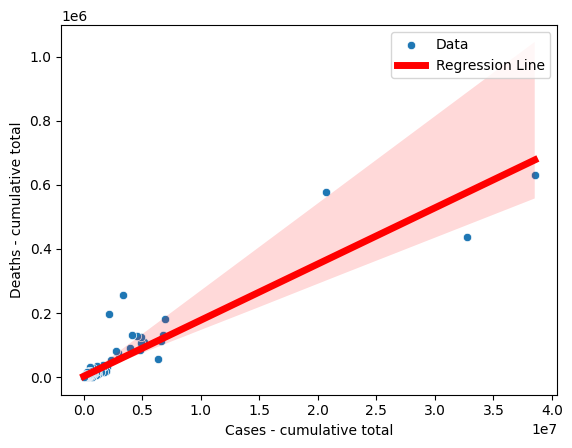

In [6]:
sns.scatterplot(data=df, x="Cases - cumulative total", y="Deaths - cumulative total", label="Data")
sns.regplot(data=df, x="Cases - cumulative total", y="Deaths - cumulative total", color="red", scatter=False, label="Regression Line", line_kws={"linewidth":5})
plt.legend()
plt.show()

### c. Third Pair

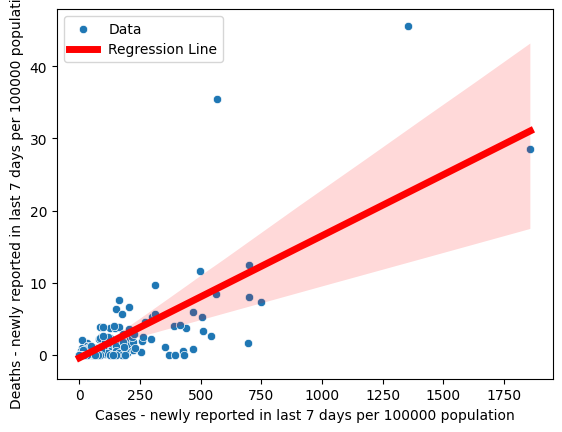

In [7]:
sns.scatterplot(data=df, x="Cases - newly reported in last 7 days per 100000 population", y="Deaths - newly reported in last 7 days per 100000 population", label="Data")
sns.regplot(data=df, x="Cases - newly reported in last 7 days per 100000 population", y="Deaths - newly reported in last 7 days per 100000 population", color="red", scatter=False, label="Regression Line", line_kws={"linewidth":5})
plt.legend()
plt.show()

# Clustering Portion

## Colors for Clusters

In [106]:
# build a list of 1000 random colors, because I got sick of having to add more colors as the number of clusters grew
colors = []
for i in range(1000):
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    rgbcode = "#" + f"{r:02x}" + f"{g:02x}" + f"{b:02x}"
    
    # ensure uniqueness AND make sure the color is not too close to white (FFFFFF - 255+255+255)
    # we'll use 720 as our threshold, meaning the "closest" color to white will be #F0F0F0, or 240+240+240
    while((rgbcode in colors) | (r+g+b > 720)):
        r = random.randint(0, 255)
        g = random.randint(0, 255)
        b = random.randint(0, 255)
        rgbcode = "#" + f"{r:02x}" + f"{g:02x}" + f"{b:02x}"
    
    # We are now guaranteed to have a unique hex code that is not already in the list
    colors.append(rgbcode)

## First clustering method - K-Means

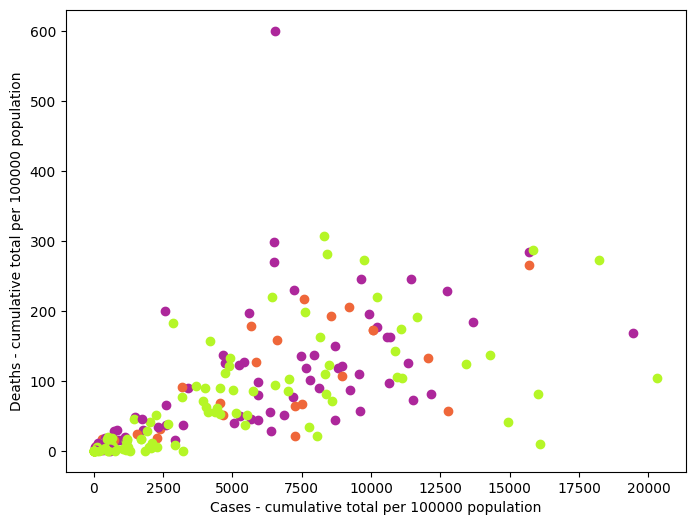

In [107]:
km = KMeans(n_clusters=3)

clustering = km.fit(df[["Cases - cumulative total per 100000 population", "Deaths - cumulative total per 100000 population"]])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

for i in df.index:
    ax.scatter(df["Cases - cumulative total per 100000 population"][i], df["Deaths - cumulative total per 100000 population"][i], color=colors[clustering.labels_[i-1]])

ax.set_xlabel("Cases - cumulative total per 100000 population")
ax.set_ylabel("Deaths - cumulative total per 100000 population")

plt.show()

## Second clustering method - Affinity Propagation

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


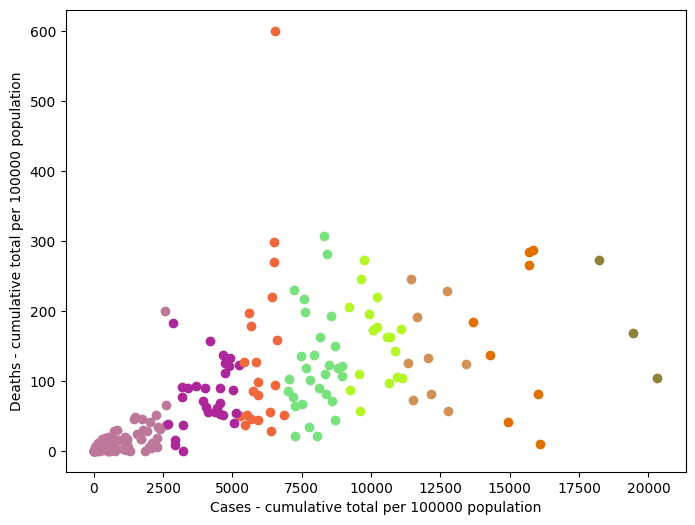

In [108]:
affinity = AffinityPropagation()

clustering = affinity.fit(df[["Cases - cumulative total per 100000 population", "Deaths - cumulative total per 100000 population"]])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

for i in df.index:
    ax.scatter(df["Cases - cumulative total per 100000 population"][i], df["Deaths - cumulative total per 100000 population"][i], color=colors[clustering.labels_[i]])

ax.set_xlabel("Cases - cumulative total per 100000 population")
ax.set_ylabel("Deaths - cumulative total per 100000 population")

plt.show()